# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as soup
import matplotlib.pyplot as plt
import pandas as pd
import datetime

In [2]:
executable_path = {'executable_path':"C:/Program Files/chromedriver/chromedriver.exe"}

# Launch the browser
browser = Browser('chrome', **executable_path)

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [4]:
# Create a Beautiful Soup Object
html = browser.html
table_soup = soup(html, 'html.parser')

In [5]:
# Extract all rows of data
table = table_soup.find('table')
#! print(table)

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [6]:
# Create an empty list
mars_table = []

#find rows and use len to make sure it worked
for mars_data in table.find_all('tbody'):
    rows = mars_data.find_all('tr', class_='data-row')
    print(f"number of rows: {len(rows)}")

# Loop through the scraped data to create a list of rows\
for row in rows:
    id = row.find_all('td')[0].text
    terrest_date = row.find_all('td')[1].text
    sol = row.find_all('td')[2].text
    ls = row.find_all('td')[3].text
    month = row.find_all('td')[4].text
    min_temp = row.find_all('td')[5].text
    pressure = row.find_all('td')[6].text
    #add scraped data to the list
    data = {
        'ID': id,
        'Terrestrial Date': terrest_date,
        'SOL': sol,
        'Solar Longitude': ls,
        'Month': month,
        'Minimum Temp (C)': min_temp,
        "Pressure": pressure
    }
    mars_table.append(data)
#! print(mars_table)

number of rows: 1867


In [73]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
mars_df = pd.DataFrame(mars_table)
mars_df


,ID,Terrestrial Date,SOL,Solar Longitude,Month,Minimum Temp (C),Pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [8]:
# Examine data type of each column
mars_df.dtypes

ID                  object
Terrestrial Date    object
SOL                 object
Solar Longitude     object
Month               object
Minimum Temp (C)    object
Pressure            object
dtype: object

In [75]:
#convert types for data analysis
#! print(mars_df.columns)
mars_df['ID'] = mars_df['ID'].astype(int)
mars_df['Terrestrial Date'] = pd.to_datetime(mars_df['Terrestrial Date'])
mars_df['SOL'] = mars_df['SOL'].astype(int)
mars_df['Solar Longitude'] = mars_df['Solar Longitude'].astype(int)
mars_df['Month'] = mars_df['Month'].astype(int)
mars_df['Minimum Temp (C)'] = pd.to_numeric(mars_df['Minimum Temp (C)'])
mars_df['Pressure'] = mars_df['Pressure'].astype(float)

In [31]:
# Confirm type changes were successful by examining data types again
mars_df.dtypes
#! mars_df.head()

ID                           int32
Terrestrial Date    datetime64[ns]
SOL                          int32
Solar Longitude              int32
Month                        int32
Minimum Temp (C)           float64
Pressure                   float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [13]:
# 1. How many months are there on Mars?
len(mars_df["Month"].unique())

12

In [14]:
# 2. How many Martian days' worth of data are there?
mars_df["SOL"].max()

1977

In [56]:
# 3. What is the average low temperature by month?
avg_temps = round((mars_df.groupby("Month")["Minimum Temp (C)"].mean()), 3)

avg_temps

Month
1    -77.161
2    -79.933
3    -83.307
4    -82.747
5    -79.309
6    -75.299
7    -72.282
8    -68.383
9    -69.172
10   -71.982
11   -71.986
12   -74.452
Name: Minimum Temp (C), dtype: float64

Text(0, 0.5, 'Average Temp (C)')

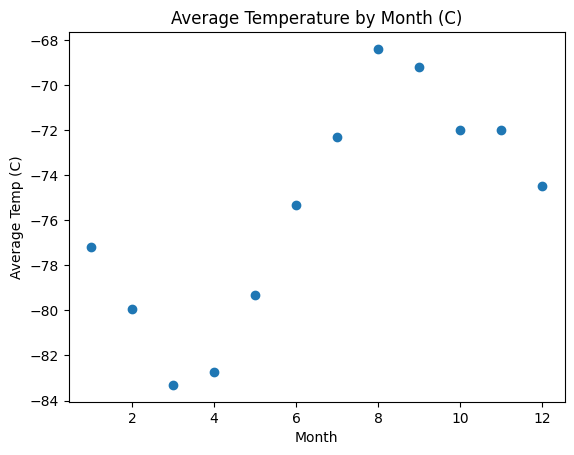

In [57]:
# Plot the average temperature by month
x_values = avg_temps.index
y_values = avg_temps.values

plt.scatter(x_values, y_values)
plt.title("Average Temperature by Month (C)")
plt.xlabel("Month")
plt.ylabel("Average Temp (C)")

In [58]:
# Identify the coldest and hottest months in Curiosity's location
coldest_temp = avg_temps.min()
hottest_temp = avg_temps.max()

coldest_month = avg_temps[avg_temps == coldest_temp].index[0]
hottest_month = avg_temps[avg_temps == hottest_temp].index[0]

print(f"The coldest month on Mars is Month #{coldest_month} with an average temp of {coldest_temp} C.")
print(f"The hottest month on Mars is Month #{hottest_month} with an average temp of {hottest_temp} C.")

The coldest month on Mars is Month #3 with an average temp of -83.307 C.
The hottest month on Mars is Month #8 with an average temp of -68.383 C.


In [59]:
# 4. Average pressure by Martian month
avg_press = round((mars_df.groupby("Month")["Pressure"].mean()), 3)
avg_press

Month
1     862.489
2     889.455
3     877.323
4     806.330
5     748.557
6     745.054
7     795.106
8     873.830
9     913.306
10    887.312
11    857.014
12    842.157
Name: Pressure, dtype: float64

Text(0, 0.5, 'Average Pressure')

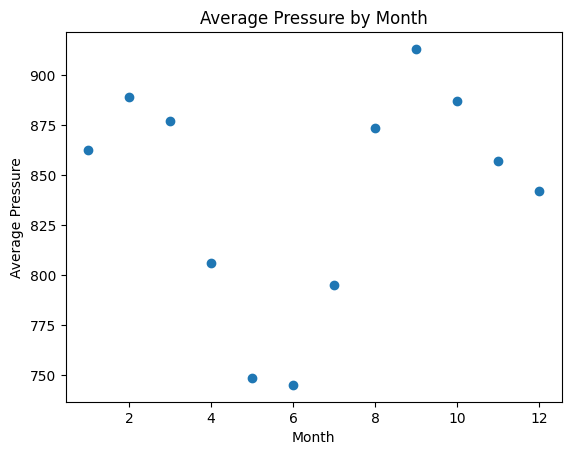

In [62]:
# Plot the average pressure by month
x_press = avg_press.index
y_press = avg_press.values

plt.scatter(x_press, y_press)
plt.title("Average Pressure by Month")
plt.xlabel("Month")
plt.ylabel("Average Pressure")

Based on the graph, there are approximately 700 Earth days in one Martian year.


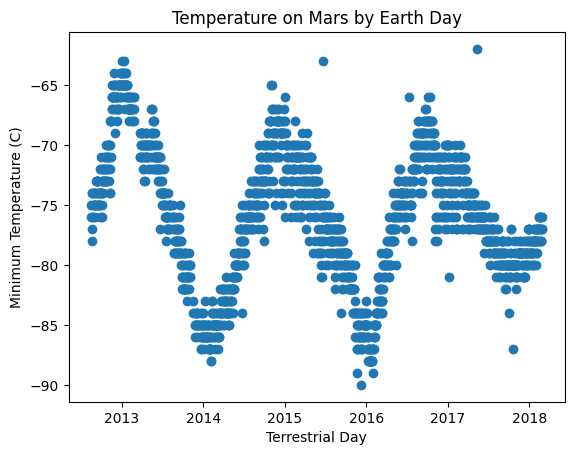

In [84]:
# 5. How many terrestrial (earth) days are there in a Martian year?
#! mars_df
x_temp = mars_df['Terrestrial Date']
y_temp = mars_df['Minimum Temp (C)']

plt.scatter(x_temp, y_temp)
plt.title('Temperature on Mars by Earth Day')
plt.xlabel('Terrestrial Day')
plt.ylabel('Minimum Temperature (C)')


print(f"Based on the graph, there are approximately 700 Earth days in one Martian year.")

On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [81]:
# Write the data to a CSV
mars_df.to_csv('C:/Users/ginav/Desktop/Analysis Projects/Class Activity Files/Module 11/mars-challenge/mars-challenge/Starter_Code/mars_data.csv')

In [ ]:
browser.quit()